# Basic Info


In [21]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join( os.pardir, 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from modules import dataloading as dl
from modules import VizAx as va

images_dir = '../src/iamges/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('../src/data/training_data.csv')

In [3]:
df = dl.rename_cols(df)

In [4]:
df

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_apr,default
0,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
2,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,40000,2,2,1,38,0,0,3,2,2,...,39924,39004,41462,4600,1200,1400,0,3069,0,1
22496,350000,1,1,1,42,-1,-1,-1,-1,-1,...,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
22497,100000,2,3,2,46,1,-1,2,2,-1,...,0,7856,16544,203,0,0,7856,10000,865,0
22498,20000,2,3,1,50,-1,-1,-1,-1,-2,...,0,0,0,3754,6906,290,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   max_credit      22500 non-null  object
 1   gender          22500 non-null  object
 2   education       22500 non-null  object
 3   marital_status  22500 non-null  object
 4   age             22500 non-null  object
 5   pay_status_sep  22500 non-null  object
 6   pay_status_aug  22500 non-null  object
 7   pay_status_jul  22500 non-null  object
 8   pay_status_jun  22500 non-null  object
 9   pay_status_may  22500 non-null  object
 10  pay_status_apr  22500 non-null  object
 11  bill_sep        22500 non-null  object
 12  bill_aug        22500 non-null  object
 13  bill_jul        22500 non-null  object
 14  bill_jun        22500 non-null  object
 15  bill_may        22500 non-null  object
 16  bill_apr        22500 non-null  object
 17  payment_sep     22500 non-null  object
 18  paymen

In [6]:
df.describe()

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_apr,default
count,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,...,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500
unique,81,3,8,5,56,12,12,12,12,11,...,16768,16326,16093,6631,6569,6258,5757,5750,5789,3
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,2534,13572,10516,12026,1243,11057,11804,11823,12330,12706,...,2390,2594,3000,3905,4036,4440,4840,5015,5418,17471


There are no missing values. But all the values are objects. Will re-read the dataframe again with integers.

In [7]:
df = df.apply(pd.to_numeric);

ValueError: Unable to parse string "LIMIT_BAL" at position 18381

In [8]:
df.iloc[18381]

max_credit                         LIMIT_BAL
gender                                   SEX
education                          EDUCATION
marital_status                      MARRIAGE
age                                      AGE
pay_status_sep                         PAY_0
pay_status_aug                         PAY_2
pay_status_jul                         PAY_3
pay_status_jun                         PAY_4
pay_status_may                         PAY_5
pay_status_apr                         PAY_6
bill_sep                           BILL_AMT1
bill_aug                           BILL_AMT2
bill_jul                           BILL_AMT3
bill_jun                           BILL_AMT4
bill_may                           BILL_AMT5
bill_apr                           BILL_AMT6
payment_sep                         PAY_AMT1
payment_aug                         PAY_AMT2
payments_jul                        PAY_AMT3
payment_jun                         PAY_AMT4
payment_may                         PAY_AMT5
payment_ap

Need to drop this row. It can be used as column names but we already created better ones. Will drop and try converting again.

In [9]:
df.drop(index=18381, inplace=True)

In [10]:
df = df.apply(pd.to_numeric)

In [11]:
df.describe()

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_apr,default
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,1.603227,1.855282,1.553358,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,...,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,129864.960118,0.489239,0.791905,0.521418,9.237634,1.123191,1.197954,1.198880,1.174824,1.139984,...,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


The dataset contains some basic demographic data about each of the customers, data about credit card bills between April and September of a certain year, and whether they defaulted on those bills. 

## Looking at variables

### Target Variable: `default`

In [16]:
df.default.value_counts()

0    17471
1     5028
Name: default, dtype: int64

In [12]:
df.default.describe()

count    22499.000000
mean         0.223477
std          0.416584
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

About 22.3% of persons in this dataset have defaulted on one of those payments.

In [14]:
df[df.default == 1].describe()

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_apr,default
count,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,...,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.0
mean,129301.447892,1.568616,1.902347,1.525656,35.699085,0.665871,0.466985,0.379674,0.265314,0.182776,...,42164.957836,39490.294948,38341.499602,3412.719570,3338.311854,3429.823787,3179.279435,3299.637033,3403.056484,1.0
std,115571.184109,0.495319,0.735722,0.519692,9.798058,1.375180,1.487934,1.494516,1.511449,1.487768,...,64319.096757,60926.608682,59533.699527,9644.493057,11281.995540,13610.916762,11974.857913,12641.164329,13814.100838,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,2253.750000,1473.000000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19256.500000,18683.500000,18155.500000,1691.000000,1517.000000,1238.000000,1000.000000,1000.000000,1000.000000,1.0
75%,190000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,50339.250000,47778.000000,47508.750000,3466.250000,3300.000000,3000.000000,2900.000000,3000.000000,2900.000000,1.0
max,720000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,530672.000000,496801.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [15]:
df[df.default == 0].describe()

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_apr,default
count,17471.000000,17471.000000,17471.000000,17471.000000,17471.000000,17471.000000,17471.000000,17471.000000,17471.000000,17471.000000,...,17471.000000,17471.000000,17471.000000,17471.000000,1.747100e+04,17471.000000,17471.000000,17471.000000,17471.000000,17471.0
mean,177919.523782,1.613188,1.841738,1.561330,35.375651,-0.209776,-0.300269,-0.315551,-0.352699,-0.387041,...,43664.193692,40541.233129,39131.560472,6265.428481,6.720156e+03,5785.307882,5257.378227,5316.342510,5778.030393,0.0
std,131708.375639,0.487034,0.806861,0.521657,9.068939,0.953473,1.038988,1.048928,1.017215,0.981886,...,64687.684696,60916.519066,59842.411161,18096.662061,2.702362e+04,19231.516424,16799.771914,16211.171236,18870.637742,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2339.500000,1781.500000,1242.000000,1156.000000,1.005000e+03,600.000000,390.000000,360.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18940.000000,17850.000000,16505.000000,2417.000000,2.235000e+03,2000.000000,1703.000000,1735.000000,1700.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55841.000000,51153.000000,49841.000000,5600.000000,5.328000e+03,5000.000000,4581.500000,4657.500000,4613.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,0.0


### CC Bill Features: `pay_status` + month

In [17]:
df.pay_status_apr.value_counts()

 0    12233
-1     4284
-2     3663
 2     2078
 3      140
 7       38
 4       38
 6       14
 5        9
 8        2
Name: pay_status_apr, dtype: int64

It seems that this variable shows how many months away from due date the payment was made. -2 means two months ahead, 0 means duly, and 8 means 8 months late. The bakeoff_instructions arene't exactly clear though.

FileNotFoundError: [Errno 2] No such file or directory: '../src/iamges/Frequency of Payment Status in April.png'

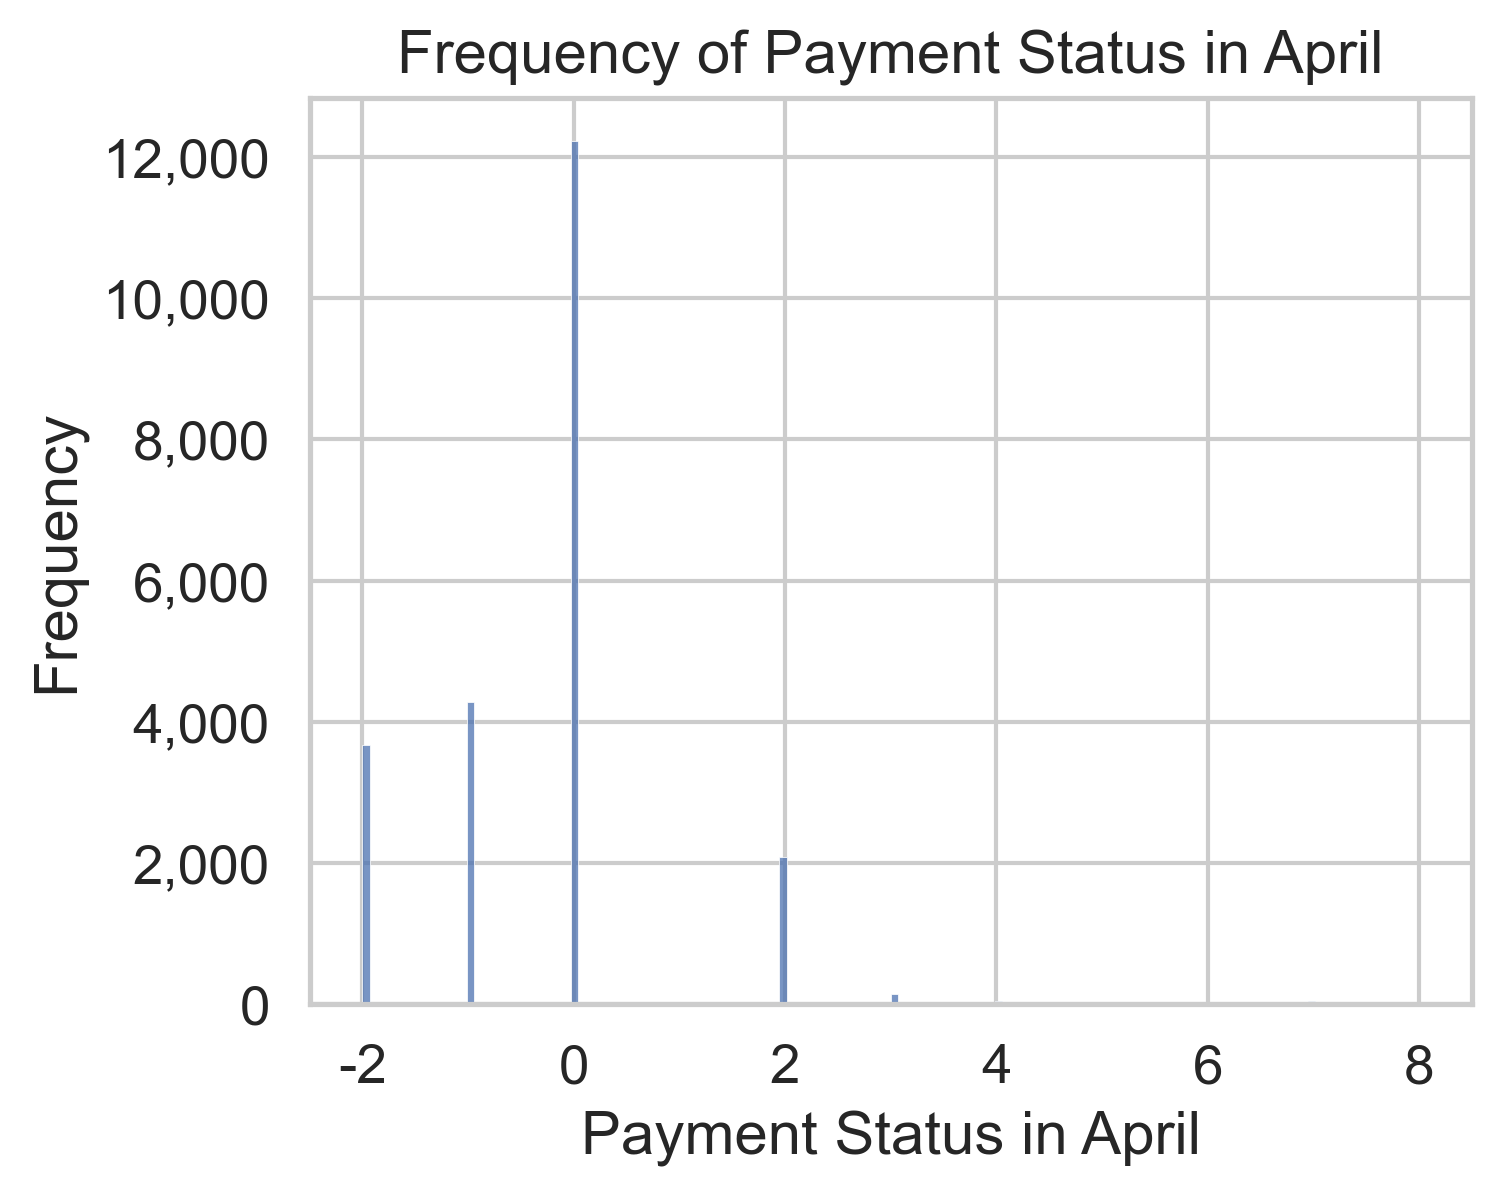

In [22]:
va.PlotHist(df, 'pay_status_apr', targetdir=images_dir)